In [1]:
import numpy as np
from scipy.integrate import solve_ivp

# matplotlib imports
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation


$$
\begin{bmatrix} \dot \theta \\ \ddot \theta \end{bmatrix} = \begin{bmatrix} \dot \theta \\ -\dfrac{g \sin \theta }{l} \end{bmatrix}
$$

In [2]:
g = 9.81  # m/s^2
ell = 1.0  # m

# initial conditions: theta=30°, velocity=0ms^-1
theta0 = np.deg2rad(30)
theta0_dot = 0.0

# differential equations
def pendulum_ODE(t, y):
    return (y[1], -g * np.sin(y[0])/ell)

# solve the ODE
sol = solve_ivp(pendulum_ODE, (0.0, 10.0), (theta0, theta0_dot), t_eval=np.linspace(0.0, 10.0, 1000))

# output the solution
theta, theta_dot = sol.y
t = sol.t

# convert from radians to degrees
theta_deg = np.rad2deg(theta)
theta_dot_deg = np.rad2deg(theta_dot)

# save to file
np.savetxt('simple_pendulum.csv', np.transpose([t, theta_deg, theta_dot_deg]), delimiter=',')

In [3]:
# change matplotlib defaults
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['legend.labelcolor'] = 'white'
plt.rcParams['xtick.labelcolor'] = 'white'
plt.rcParams['ytick.labelcolor'] = 'white'
plt.rcParams['grid.color'] = '#707070'

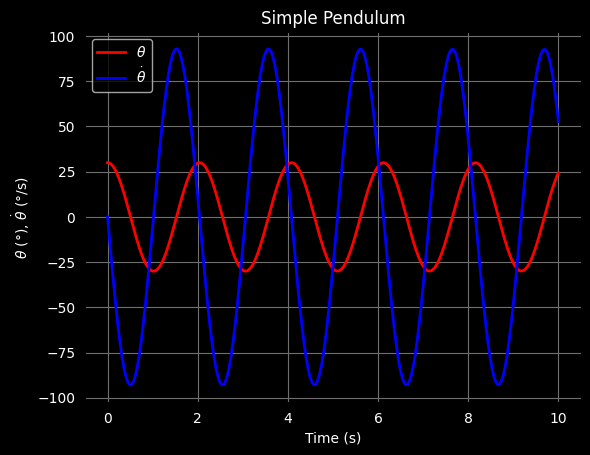

In [4]:
# create plot of theta and theta_dot against time
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Simple Pendulum')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ (°), $\dot \theta$ (°/s)')
plt.grid()
plt.show()

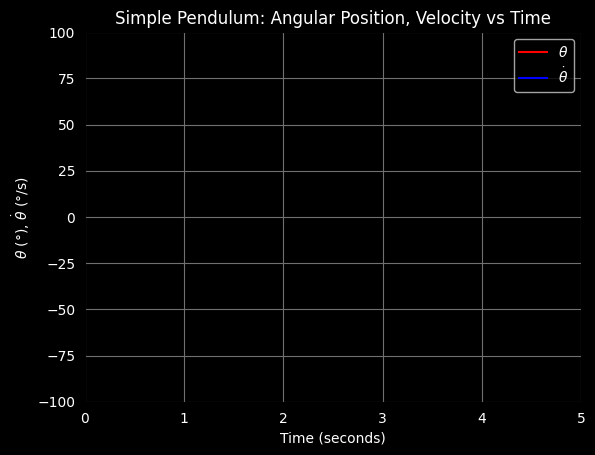

In [6]:
# animate theta, theta_dot vs time
fig, ax = plt.subplots()

theta_curve, = ax.plot(t[0], theta_deg[0], 'r')
theta_dot_curve, = ax.plot(t[0], theta_dot_deg[0], 'b')

ax.set_title('Simple Pendulum: Angular Position, Velocity vs Time')
ax.set_xlim(0, 5)
ax.set_ylim(-100, 100)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (°), $\dot \theta$ (°/s)')
ax.legend([r'$\theta$', r'$\dot \theta$'])
ax.grid()

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

# save video @ 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=60)
ani.save('time_domain.mp4', writer=ffmpeg_writer)

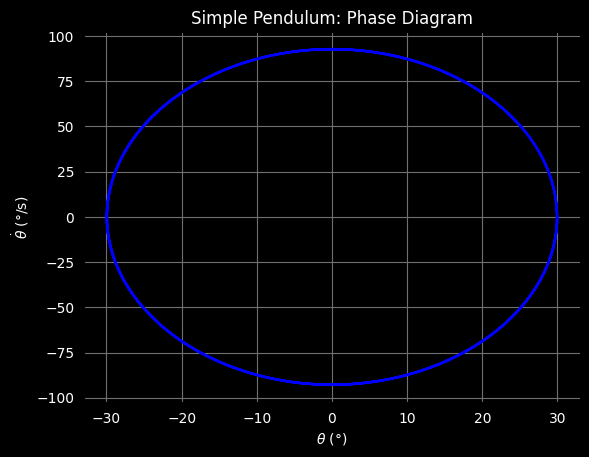

In [7]:
# create phase diagram of theta vs theta_dot
plt.plot(theta_deg, theta_dot_deg, 'b')
plt.title('Simple Pendulum: Phase Diagram')
plt.xlabel(r'$\theta$ (°)')
plt.ylabel(r'$\dot \theta$ (°/s)')
plt.grid()
plt.show()

C:\Users\Owner\AppData\Local\Temp\ipykernel_15496\2326898647.py:16: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  phase_dot.set_data(theta_deg[i], theta_dot_deg[i])


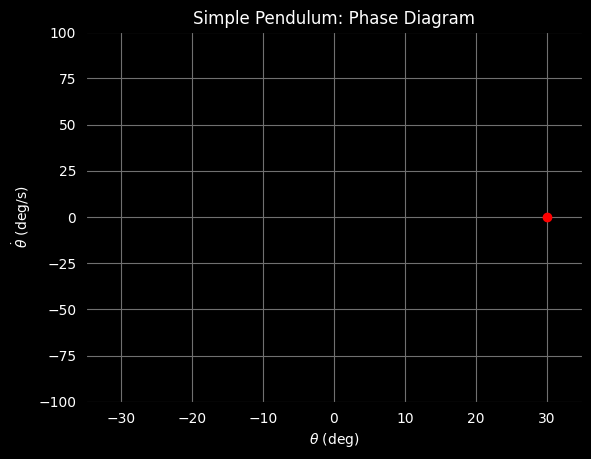

In [8]:
# animate the phase diagram
fig, ax = plt.subplots()

phase_curve, = ax.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, =  ax.plot(theta_deg[0], theta_dot_deg[0], 'ro')

ax.set_title('Simple Pendulum: Phase Diagram')
ax.set_xlim(-35, 35)
ax.set_ylim(-100, 100)
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel(r'$\dot \theta$ (deg/s)')
ax.grid()

def animate(i):
    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data(theta_deg[i], theta_dot_deg[i])

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('phase_diagram.mp4', writer=ffmpeg_writer)

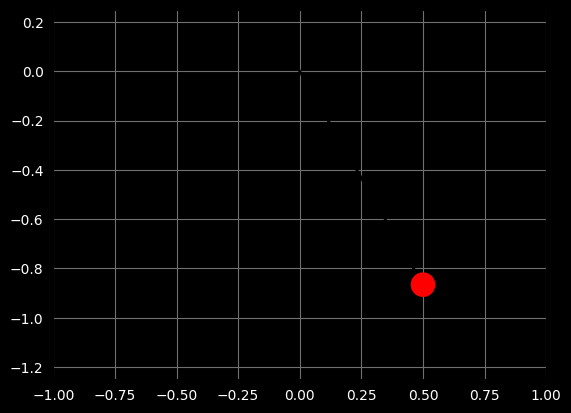

In [9]:
# create an animation of the pendulum swining with Matplotlib
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

# create figure
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1.25, 0.25)
ax.grid()

x0, y0 = pend_pos(theta0)
line, = ax.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r', zorder=3))

# animate each frame "i"
def animate(i):
    x,y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('pend.mp4', writer=ffmpeg_writer)

C:\Users\Owner\AppData\Local\Temp\ipykernel_15496\2428896804.py:46: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  phase_dot.set_data((theta_deg[i], theta_dot_deg[i]))


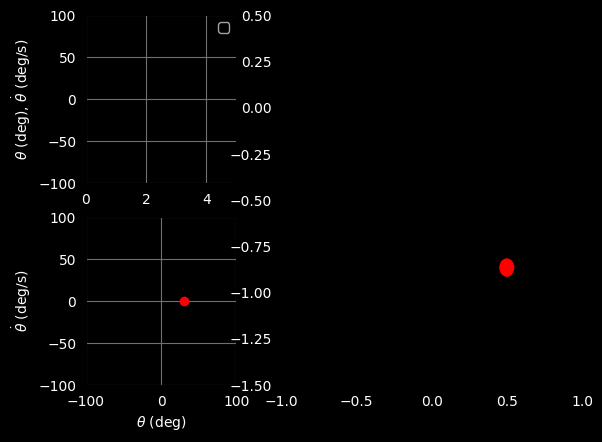

In [10]:
# animate everything together
fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1,2], height_ratios=[1,1])

# theta, theta_dot vs time
ax0 = fig.add_subplot(gs[0,0])
ax0.set_xlim(0, 5)
ax0.set_ylim(-100, 100)
ax0.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax0.legend([r'$\theta$', r'$\dot \theta$'])
ax0.grid()

theta_curve, = ax0.plot(t[0], theta_deg[0], 'b')
theta_dot_curve, = ax0.plot(t[0], theta_dot_deg[0], 'r')

# phase diagram
ax1 = fig.add_subplot(gs[1,0])
ax1.set_xlim(-100, 100)
ax1.set_ylim(-100, 100)
ax1.set_xlabel(r'$\theta$ (deg)')
ax1.set_ylabel(r'$\dot \theta$ (deg/s)')
ax1.grid()

phase_curve, = ax1.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, =  ax1.plot(theta_deg[0], theta_dot_deg[0], 'ro')

# pendulum
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

ax2 = fig.add_subplot(gs[:,1])
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1.5, 0.5)

# draw the pendulum
x0, y0 = pend_pos(theta0)
line, = ax2.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax2.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r', zorder=3))


def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data((theta_deg[i], theta_dot_deg[i]))

    x, y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save('all.mp4', writer=ffmpeg_writer)